In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
system('apt-get install libglpk-dev libgmp-dev libxml2-dev libglpk40', intern=T)
system('apt-get install -y cmake libharfbuzz-dev libfribidi-dev libudunits2-dev libcairo2-dev', intern=T)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
  [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
  [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  [4] "libxml2-dev is already the newest version (2.9.13+dfsg-1ubuntu0.4)."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
  [5] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
  [6] "  libamd2 libbtf1 libcamd2 libccolamd2 libcholmod3 libcolamd2 libcxsparse3 libgmpxx4ldbl"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
  [7] "  libgraphblas-dev libgraphblas6 libklu1 libldl2 libmetis5 libmongoose2 librbio2 libsliplu1"                     

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
  [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
  [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  [4] "libudunits2-dev is already the newest version (2.2.28-3)."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
  [5] "cmake is already the newest version (3.22.1-1ubuntu1.22.04.2)."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
  [6] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
  [7] "  gir1.2-harfbuzz-0.0 libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev libglib2.0-dev"             

In [3]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("Biobase")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Installing package(s) 'BiocVersion', 'Biobase'

also installing the dependency ‘BiocGenerics’


Old packages: 'bslib', 'shiny', 'usethis', 'uuid'



In [5]:
install.packages("svglite")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
library(CellChat, lib.loc = "/content/drive/MyDrive/R_libs")

In [7]:
library(Seurat, lib.loc = "/content/drive/MyDrive/R_libs")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:BiocGenerics’:

    intersect


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘Seurat’


The following object is masked from ‘package:igraph’:

    components




In [8]:
# Define the URL to download
file_url <- "https://cf.10xgenomics.com/samples/cell/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz"

# Define the file name for saving
file_name <- basename(file_url)

# Download the file
download.file(file_url, file_name)

# Unzip the downloaded file
untar(file_name)

In [9]:
# Load the PBMC dataset
pbmc.data <- Read10X(data.dir = "/content/filtered_gene_bc_matrices/hg19/")
# Initialize the Seurat object with the raw (non-normalized data).
pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)
pbmc

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
13714 features across 2700 samples within 1 assay 
Active assay: RNA (13714 features, 0 variable features)
 1 layer present: counts

In [10]:
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")
# Filtering
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)

In [11]:
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

Normalizing layer: counts

Finding variable features for layer counts



In [12]:
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)

Centering and scaling data matrix



In [13]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL, FTH1, LYZ, FCN1, S100A9, TYMP 
	   FCER1G, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, IFITM3, SPI1, CFP 
	   PSAP, IFI30, SAT1, COTL1, S100A11, NPC2, GRN, LGALS3, GSTP1, PYCARD 
Negative:  MALAT1, LTB, IL32, IL7R, CD2, B2M, ACAP1, CD27, STK17A, CTSW 
	   CD247, GIMAP5, AQP3, CCL5, SELL, TRAF3IP3, GZMA, MAL, CST7, ITM2A 
	   MYC, GIMAP7, HOPX, BEX2, LDLRAP1, GZMK, ETS1, ZAP70, TNFAIP8, RIC3 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1, HLA-DRA, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DMA, HLA-DPB1, HLA-DQA2, CD37, HLA-DRB5, HLA-DMB, HLA-DPA1, FCRLA, HVCN1, LTB 
	   BLNK, P2RX5, IGLL5, IRF8, SWAP70, ARHGAP24, FCGR2B, SMIM14, PPP1R14A, C16orf74 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA, FGFBP2, CTSW, GNLY, B2M, SPON2 
	   CCL4, GZMH, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX 
	   TTC38, APMAP, CTSC, S100A4, IGFBP7, ANXA1, ID2, IL32, XCL1, RHOC 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1, HLA-DPA

In [14]:
pbmc <- FindNeighbors(pbmc, dims = 1:10)
pbmc <- FindClusters(pbmc, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2638
Number of edges: 95965

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8723
Number of communities: 9
Elapsed time: 0 seconds


In [15]:
pbmc <- RunUMAP(pbmc, dims = 1:10)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
03:23:48 UMAP embedding parameters a = 0.9922 b = 1.112

03:23:48 Read 2638 rows and found 10 numeric columns

03:23:48 Using Annoy for neighbor search, n_neighbors = 30

03:23:49 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

03:23:49 Writing NN index file to temp file /tmp/Rtmpo9fnxg/file3868ff86c7

03:23:49 Searching Annoy index using 1 thread, search_k = 3000

03:23:50 Annoy recall = 100%

03:23:51 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 3

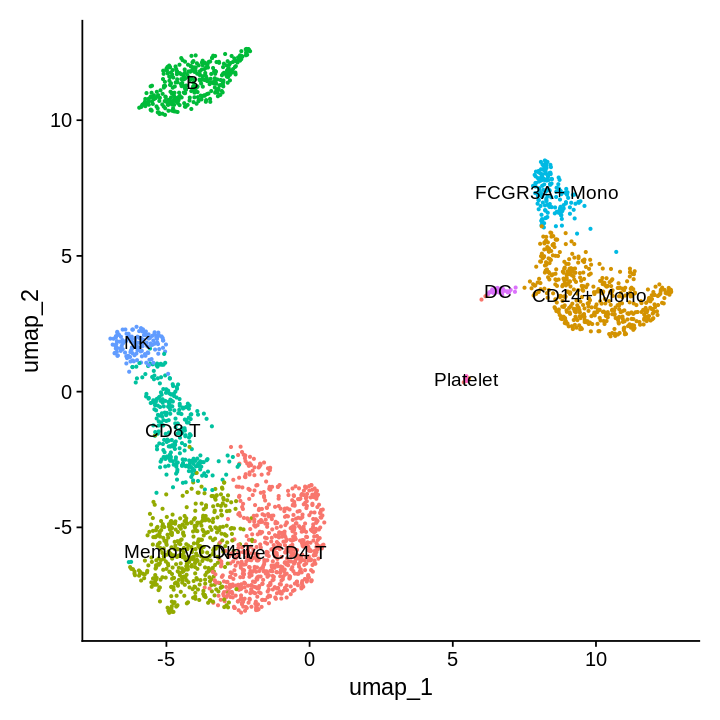

In [17]:
options(repr.plot.width = 6, repr.plot.height = 6)
new.cluster.ids <- c("Naive CD4 T", "CD14+ Mono", "Memory CD4 T", "B", "CD8 T", "FCGR3A+ Mono",
    "NK", "DC", "Platelet")
names(new.cluster.ids) <- levels(pbmc)
pbmc <- RenameIdents(pbmc, new.cluster.ids)
DimPlot(pbmc, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()



---

# Transport data from seurat object to cell chat object

In [19]:
data.input <- pbmc[["RNA"]]$data
labels <- Idents(pbmc)
meta <- data.frame(labels = labels, row.names = names(labels))
head(meta)

labels      
AAACATACAACCAC-1 Memory CD4 T
AAACATTGAGCTAC-1 B           
AAACATTGATCAGC-1 Memory CD4 T
AAACCGTGCTTCCG-1 CD14+ Mono  
AAACCGTGTATGCG-1 NK          
AAACGCACTGGTAC-1 Memory CD4 T

In [20]:
cellChat <- createCellChat(object = pbmc, group.by = "ident", assay = "RNA")

[1] "Create a CellChat object from a Seurat object"
The `meta.data` slot in the Seurat object is used as cell meta information 


Warning message in createCellChat(object = pbmc, group.by = "ident", assay = "RNA"):
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Naive CD4 T, CD14+ Mono, Memory CD4 T, B, CD8 T, FCGR3A+ Mono, NK, DC, Platelet 


In [22]:
cellChat

An object of class CellChat created from a single dataset 
 13714 genes.
 2638 cells. 
CellChat analysis of single cell RNA-seq data! 



---

# Set the ligand-receptor interaction database


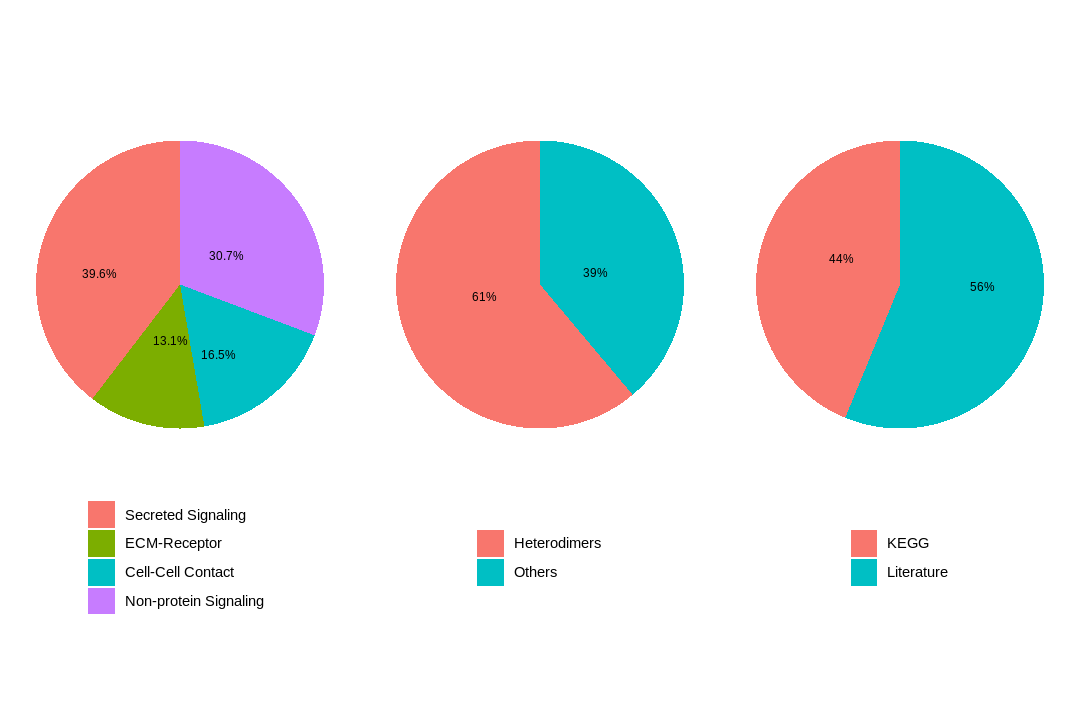

In [24]:
options(repr.plot.width = 9, repr.plot.height = 6)
CellChatDB <- CellChatDB.human # use CellChatDB.mouse if running on mouse data
showDatabaseCategory(CellChatDB)

In [25]:
# Show the structure of the database
dplyr::glimpse(CellChatDB$interaction)

Rows: 3,233
Columns: 28
$ interaction_name         <chr> "TGFB1_TGFBR1_TGFBR2", "TGFB2_TGFBR1_TGFBR2",…
$ pathway_name             <chr> "TGFb", "TGFb", "TGFb", "TGFb", "TGFb", "TGFb…
$ ligand                   <chr> "TGFB1", "TGFB2", "TGFB3", "TGFB1", "TGFB1", …
$ receptor                 <chr> "TGFbR1_R2", "TGFbR1_R2", "TGFbR1_R2", "ACVR1…
$ agonist                  <chr> "TGFb agonist", "TGFb agonist", "TGFb agonist…
$ antagonist               <chr> "TGFb antagonist", "TGFb antagonist", "TGFb a…
$ co_A_receptor            <chr> "", "", "", "", "", "", "", "", "", "", "", "…
$ co_I_receptor            <chr> "TGFb inhibition receptor", "TGFb inhibition …
$ evidence                 <chr> "KEGG: hsa04350", "KEGG: hsa04350", "KEGG: hs…
$ annotation               <chr> "Secreted Signaling", "Secreted Signaling", "…
$ interaction_name_2       <chr> "TGFB1 - (TGFBR1+TGFBR2)", "TGFB2 - (TGFBR1+T…
$ is_neurotransmitter      <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FAL…
$ ligand.symbol 

In [27]:
class(cellChat)
class(CellChatDB)

[1] "CellChat"
attr(,"package")
[1] "CellChat"

[1] "list"

In [29]:
# use a subset of CellChatDB for cell-cell communication analysis
CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling", key = "annotation") # use Secreted Signaling
# set the used database in the object
cellChat@DB <- CellChatDB.use



---

# Preprocessing the expression data for cell-cell communication analysis


In [31]:
devtools::install_github('immunogenomics/presto', lib = "/content/drive/MyDrive/R_libs")

RcppArmad... (NA -> 14.0.0-1) [CRAN]


Installing 1 packages: RcppArmadillo



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmpo9fnxg/remotes3866c6c1da8/immunogenomics-presto-7636b3d/DESCRIPTION’ ... OK
* preparing ‘presto’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘presto_1.0.0.tar.gz’



In [33]:
library(presto, lib.loc = "/content/drive/MyDrive/R_libs")

Loading required package: Rcpp

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [34]:
cellchat <- subsetData(cellChat)
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)

The number of highly variable ligand-receptor pairs used for signaling inference is 134 


In [35]:
cellchat <- computeCommunProb(cellchat, type = "triMean")

triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-07-31 04:02:53.728369]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-07-31 04:04:13.210832]"


In [39]:
df.net <- subsetCommunication(cellchat)
dim(df.net)
head(df.net)
tail(df.net)

[1] 155  11

source       target       ligand receptor   prob       pval interaction_name
1 Memory CD4 T Naive CD4 T  MIF    CD74_CXCR4 0.06745579 0    MIF_CD74_CXCR4  
2 Memory CD4 T CD14+ Mono   MIF    CD74_CXCR4 0.04354056 0    MIF_CD74_CXCR4  
3 Memory CD4 T Memory CD4 T MIF    CD74_CXCR4 0.07652706 0    MIF_CD74_CXCR4  
4 Naive CD4 T  B            MIF    CD74_CXCR4 0.05941064 0    MIF_CD74_CXCR4  
5 CD14+ Mono   B            MIF    CD74_CXCR4 0.04941440 0    MIF_CD74_CXCR4  
6 Memory CD4 T B            MIF    CD74_CXCR4 0.14117143 0    MIF_CD74_CXCR4  
  interaction_name_2 pathway_name annotation        
1 MIF - (CD74+CXCR4) MIF          Secreted Signaling
2 MIF - (CD74+CXCR4) MIF          Secreted Signaling
3 MIF - (CD74+CXCR4) MIF          Secreted Signaling
4 MIF - (CD74+CXCR4) MIF          Secreted Signaling
5 MIF - (CD74+CXCR4) MIF          Secreted Signaling
6 MIF - (CD74+CXCR4) MIF          Secreted Signaling
  evidence                      
1 PMID: 29637711; PMID: 24760155
2 PMID: 29637711; PMID: 24760155
3 PMID: 29637711; PMID: 24760155
4 PMID: 29637711; PMID: 24760155
5 PMID: 29637711; PMID: 24760155
6 PMID: 29637711; PMID: 24760155

source       target ligand receptor prob       pval interaction_name
150 Memory CD4 T NK     PPIA   BSG      0.03643765 0.00 PPIA_BSG        
151 B            NK     PPIA   BSG      0.03114654 0.01 PPIA_BSG        
152 CD8 T        NK     PPIA   BSG      0.04044644 0.00 PPIA_BSG        
153 FCGR3A+ Mono NK     PPIA   BSG      0.03508274 0.00 PPIA_BSG        
154 NK           NK     PPIA   BSG      0.04487949 0.00 PPIA_BSG        
155 DC           NK     PPIA   BSG      0.04487169 0.00 PPIA_BSG        
    interaction_name_2 pathway_name annotation         evidence      
150 PPIA - BSG         CypA         Secreted Signaling PMID: 36012604
151 PPIA - BSG         CypA         Secreted Signaling PMID: 36012604
152 PPIA - BSG         CypA         Secreted Signaling PMID: 36012604
153 PPIA - BSG         CypA         Secreted Signaling PMID: 36012604
154 PPIA - BSG         CypA         Secreted Signaling PMID: 36012604
155 PPIA - BSG         CypA         Secreted Signaling PMID: 36012604

In [40]:
cellchat <- computeCommunProbPathway(cellchat)

In [41]:
cellchat <- aggregateNet(cellchat)

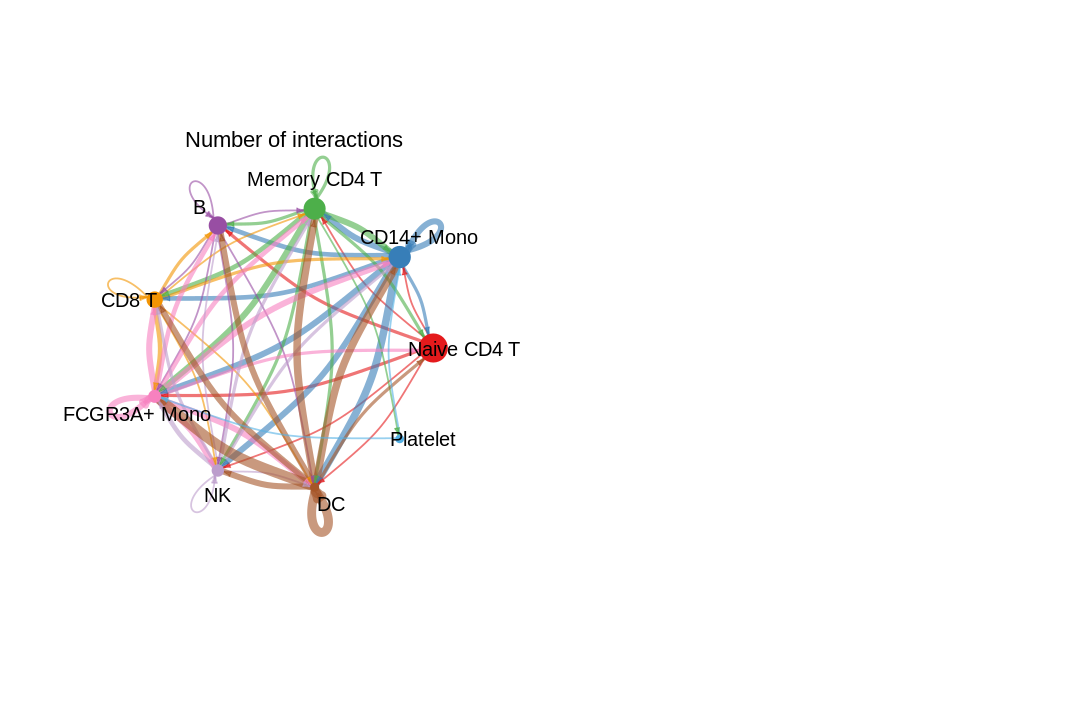

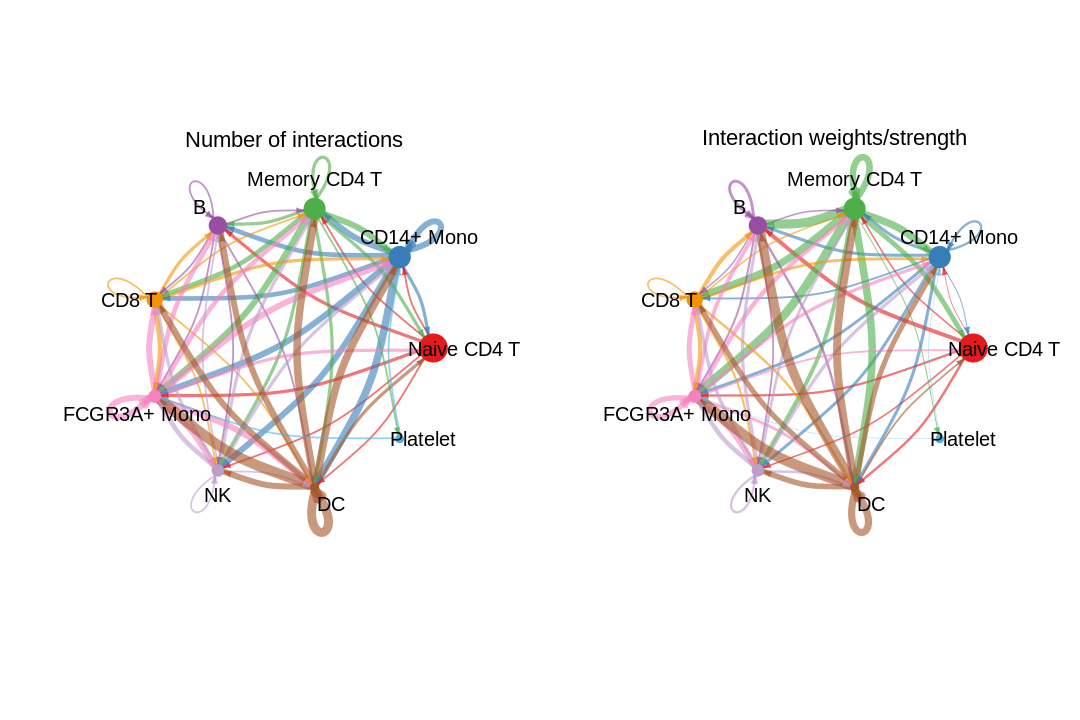

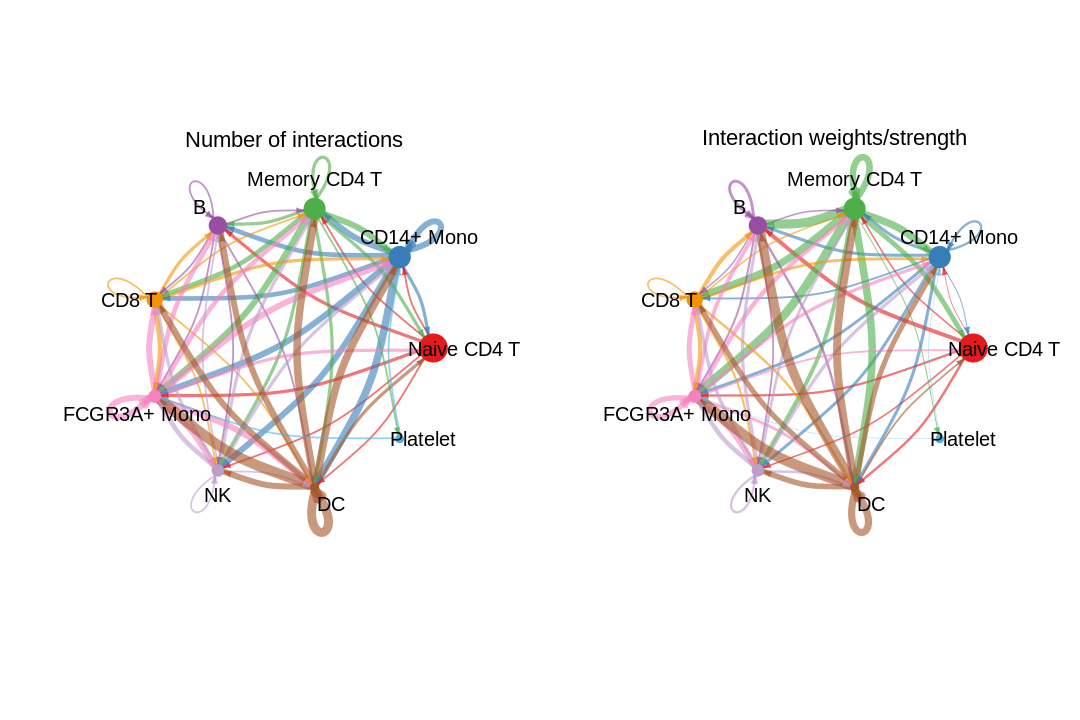

In [42]:
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,2), xpd=TRUE)
netVisual_circle(cellchat@net$count, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")
netVisual_circle(cellchat@net$weight, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")

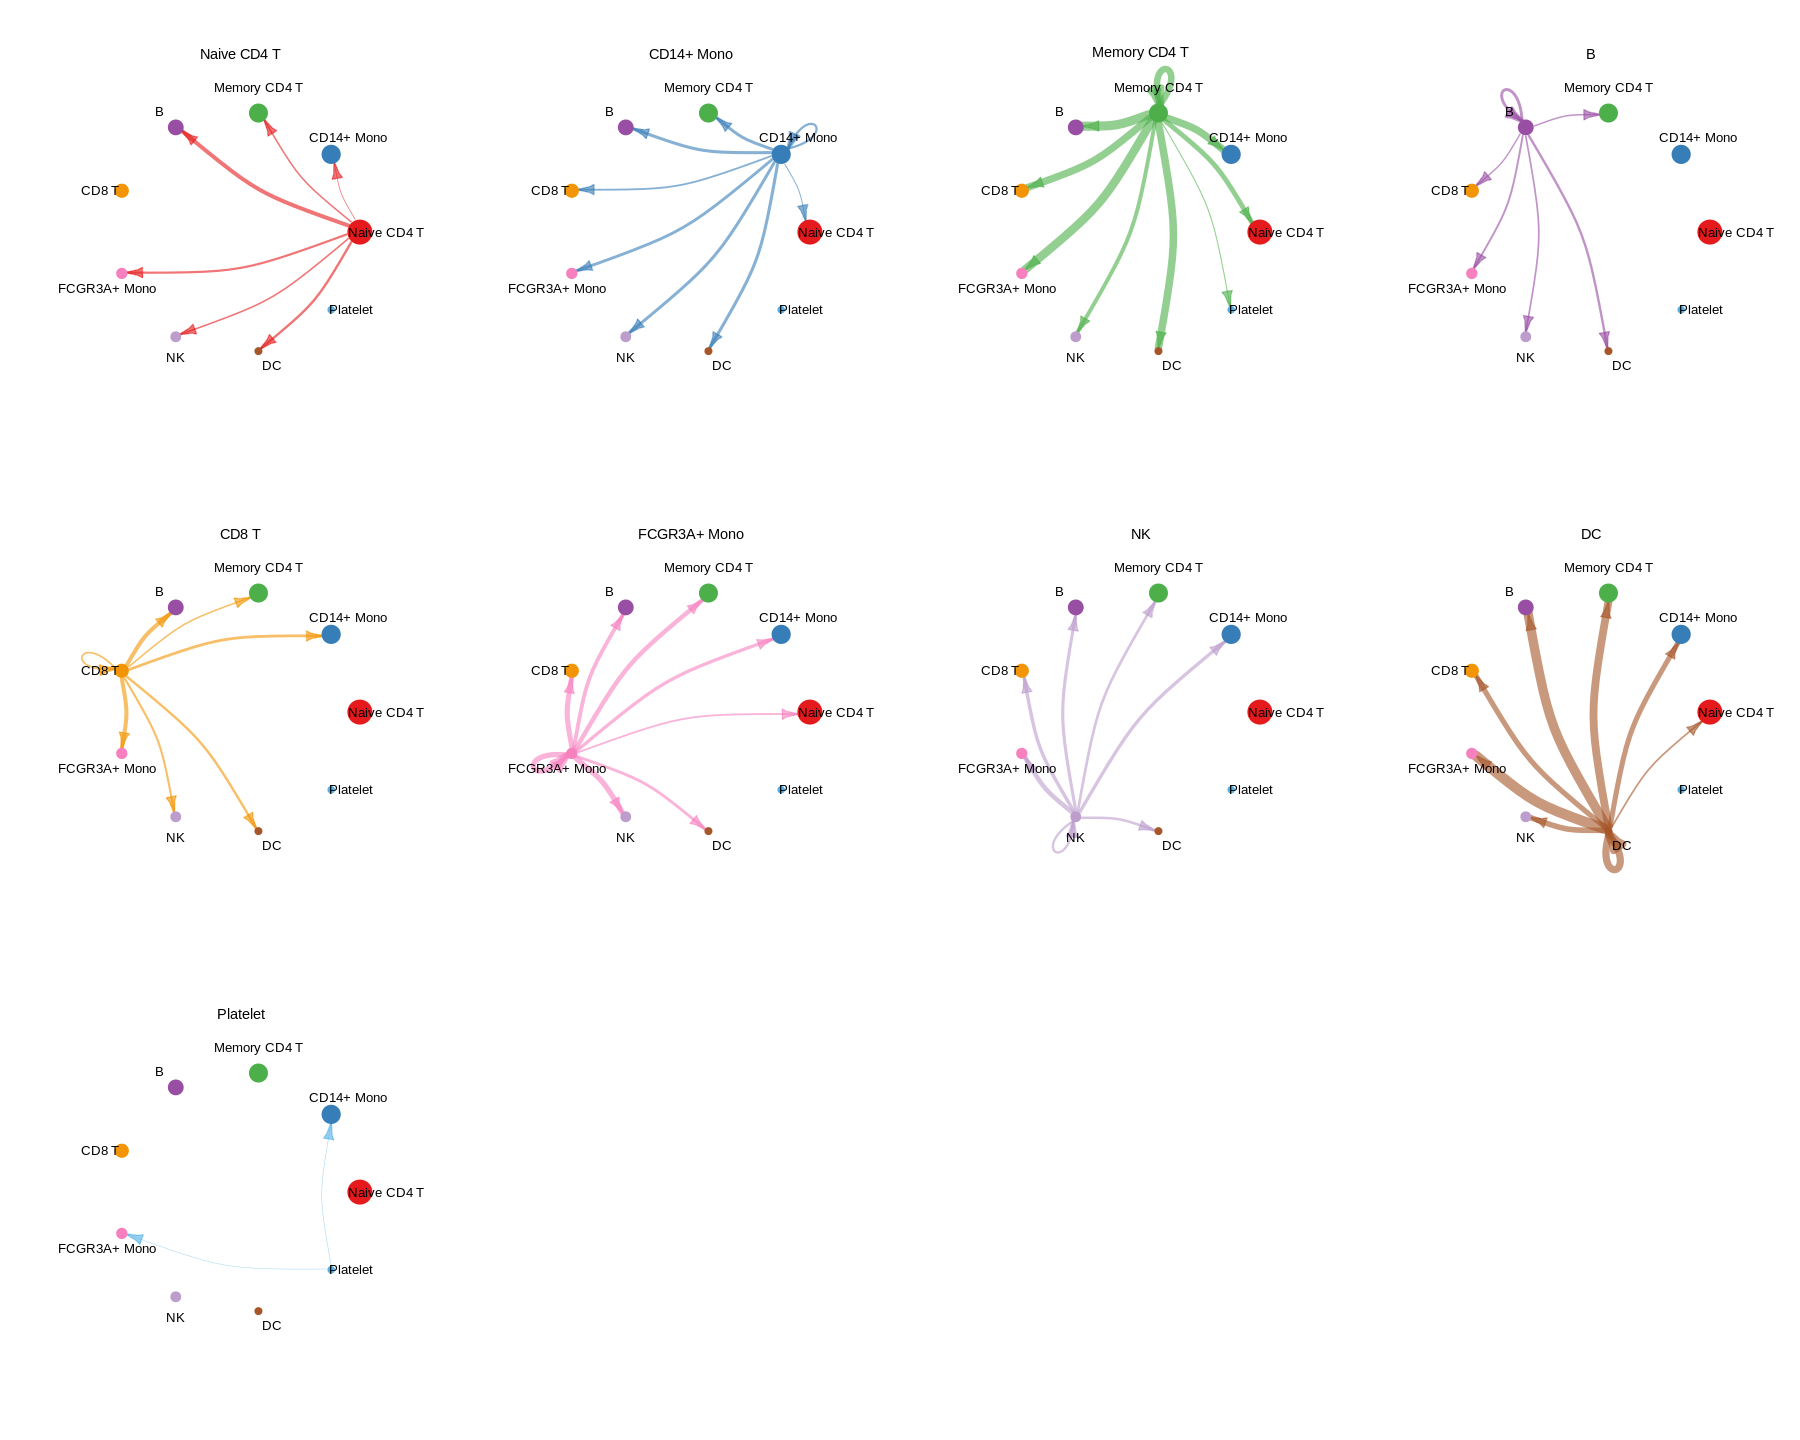

In [44]:
options(repr.plot.width = 15, repr.plot.height = 12)
mat <- cellchat@net$weight
par(mfrow = c(3,4), xpd=TRUE)
for (i in 1:nrow(mat)) {
  mat2 <- matrix(0, nrow = nrow(mat), ncol = ncol(mat), dimnames = dimnames(mat))
  mat2[i, ] <- mat[i, ]
  netVisual_circle(mat2, vertex.weight = groupSize, weight.scale = T, edge.weight.max = max(mat), title.name = rownames(mat)[i])
}



---

# Visualization of cell-cell communication network

In [58]:
unique(df.net$pathway_name)

[1] "MIF"      "IL16"     "CD40"     "ANNEXIN"  "GALECTIN" "CypA"

In [77]:
cellchat@netP$pathways

[1] "MIF"      "GALECTIN" "CypA"     "ANNEXIN"  "CD40"     "IL16"

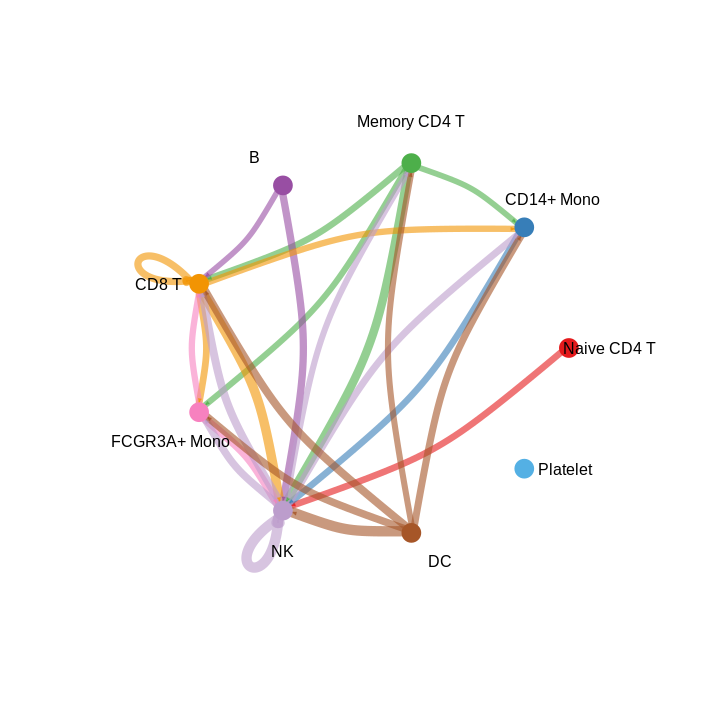

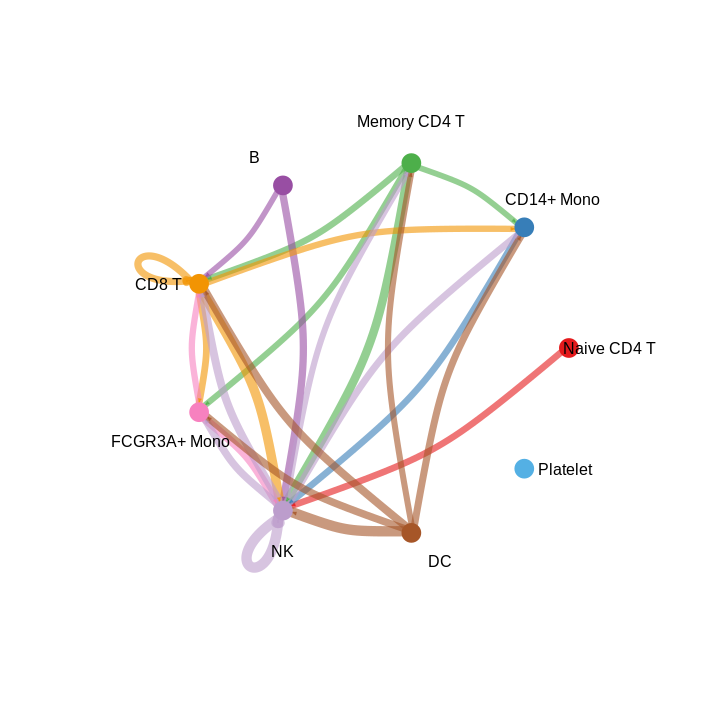

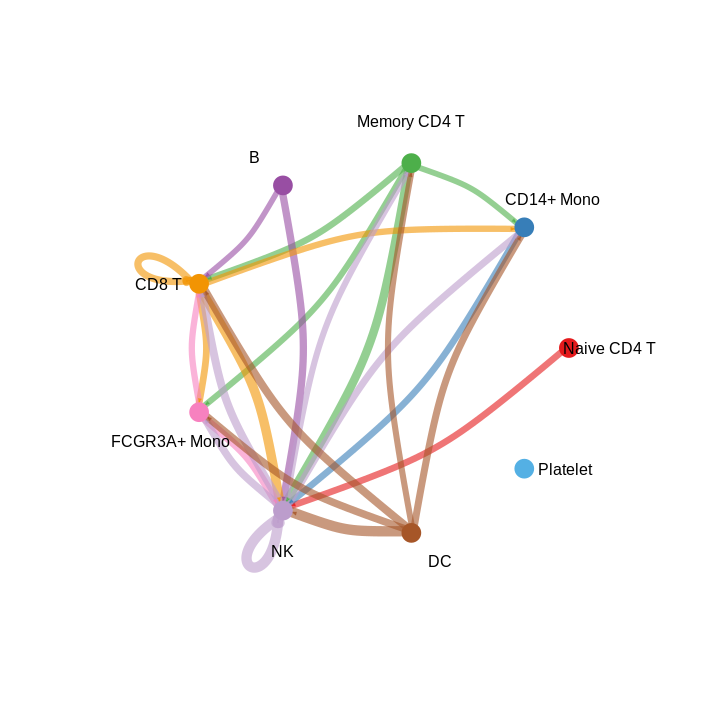

In [70]:
options(repr.plot.width = 6, repr.plot.height = 6)
pathways.show <- c("CypA")
vertex.receiver = seq(1,4)
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver)
# Circle plot
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle")

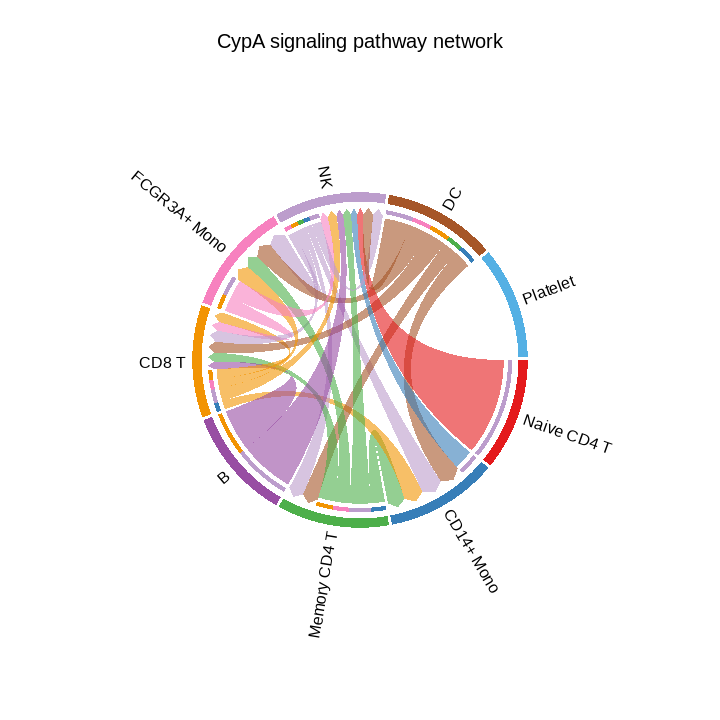

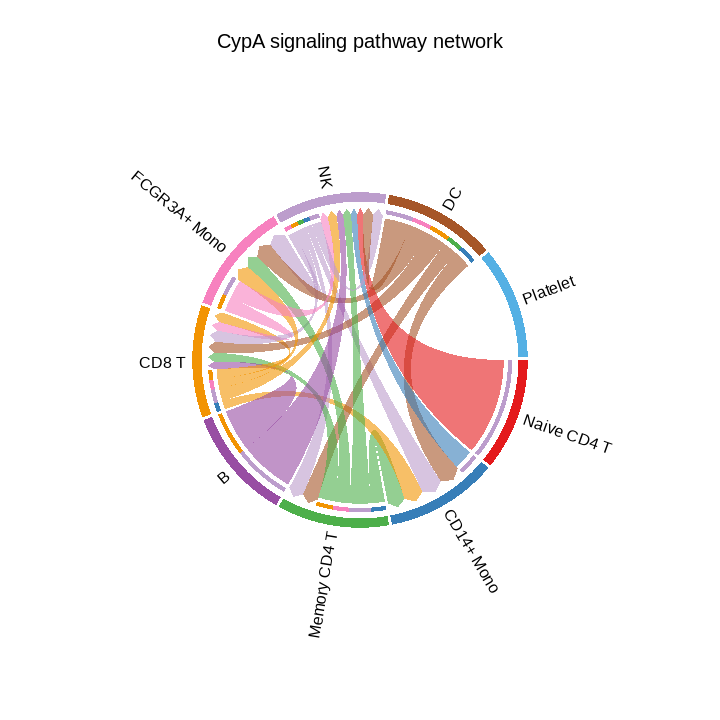

In [69]:
# Chord diagram
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "chord")

Do heatmap based on a single object 




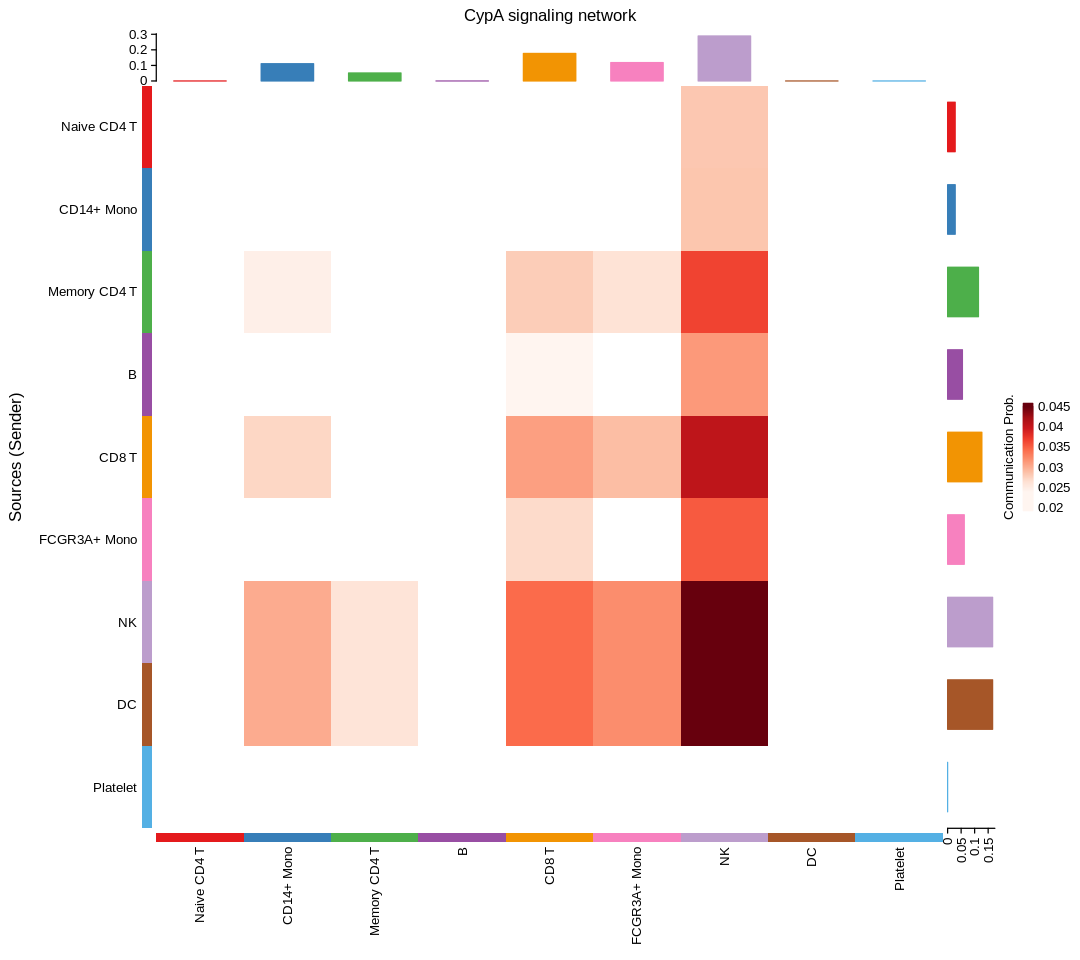

In [72]:
options(repr.plot.width = 9, repr.plot.height = 8)
netVisual_heatmap(cellchat, signaling = pathways.show, color.heatmap = "Reds")

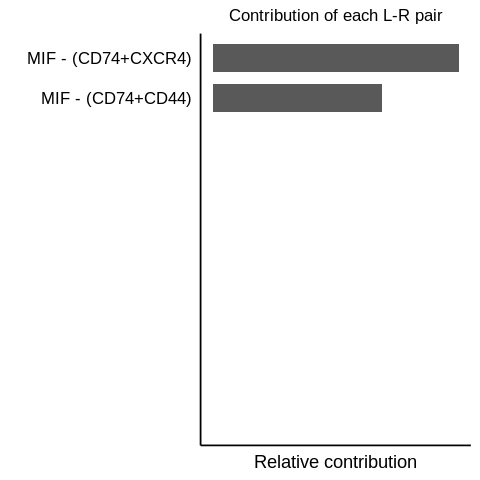

In [78]:
options(repr.plot.width = 4, repr.plot.height = 4)
netAnalysis_contribution(cellchat, signaling = "MIF")

Comparing communications on a single object 




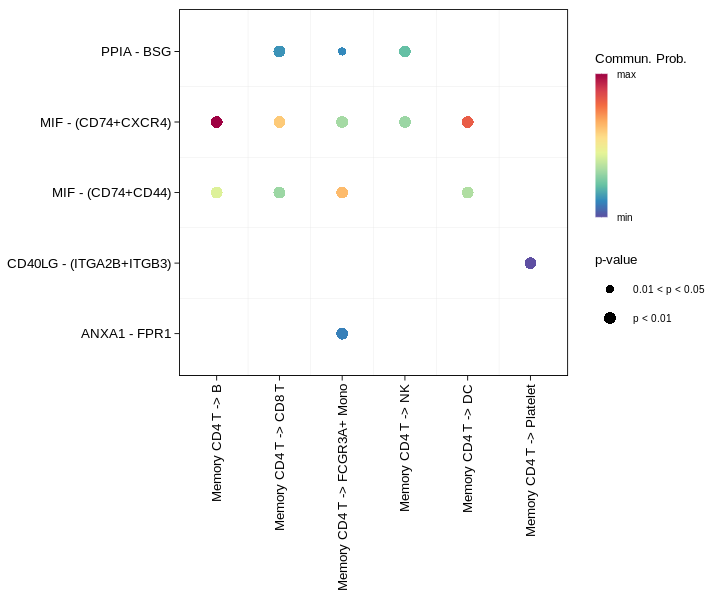

In [88]:
options(repr.plot.width = 6, repr.plot.height = 5)
netVisual_bubble(cellchat, sources.use = 3, targets.use = c(4:9), remove.isolate = FALSE)

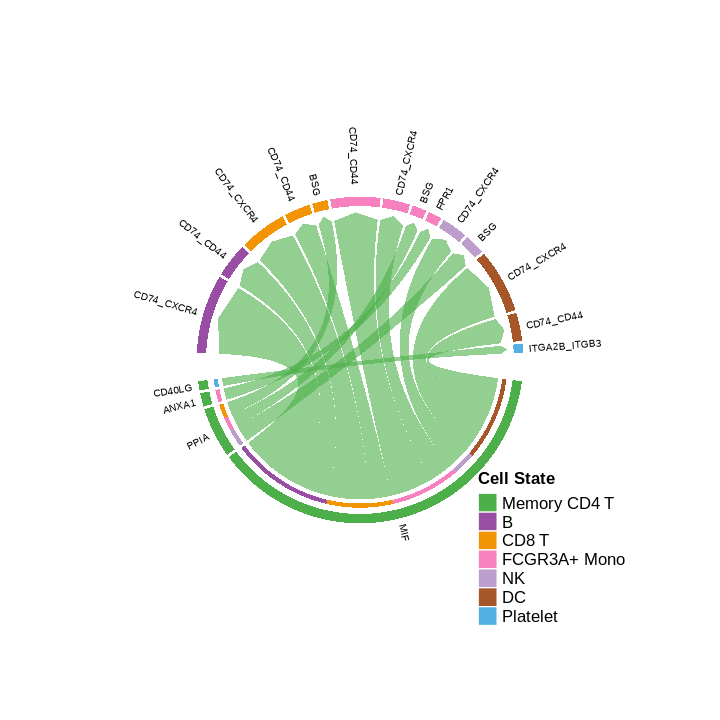

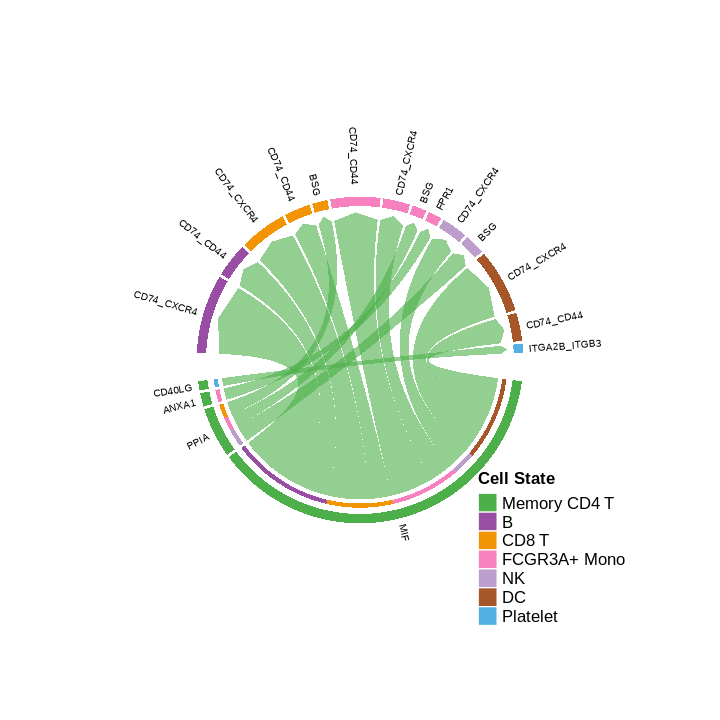

In [93]:
options(repr.plot.width = 6, repr.plot.height = 6)
netVisual_chord_gene(cellchat, sources.use = 3, targets.use = c(4:9), lab.cex = 0.5,legend.pos.y = 20)

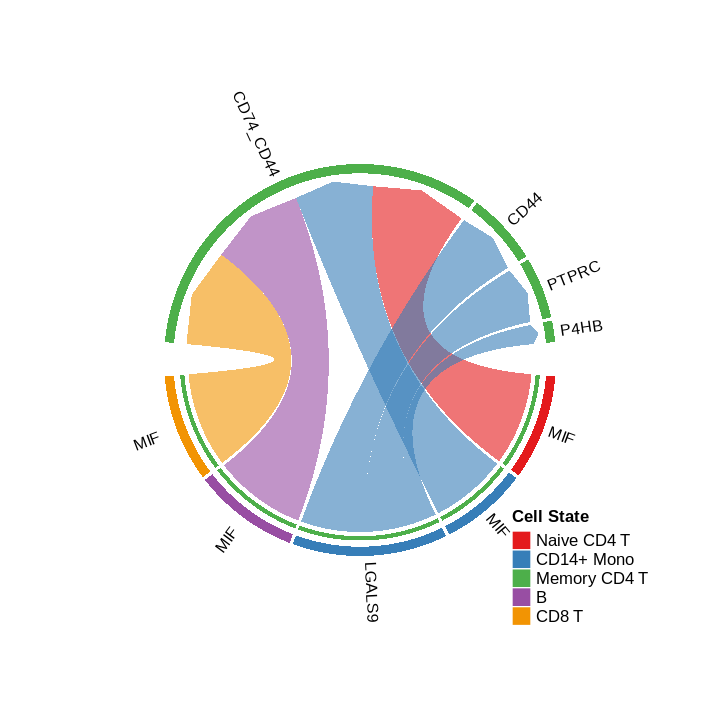

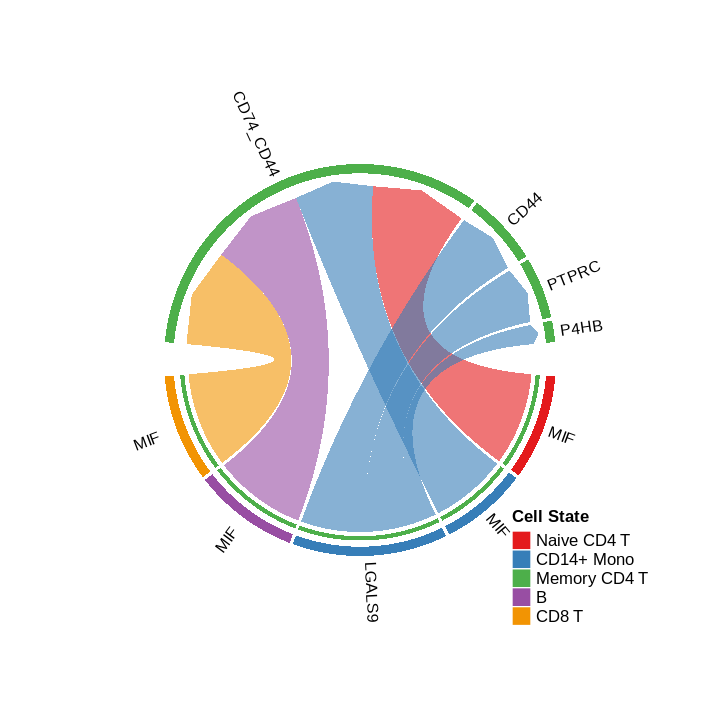

In [94]:
netVisual_chord_gene(cellchat, sources.use = c(1,2,5,4), targets.use = 3, legend.pos.x = 15)

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


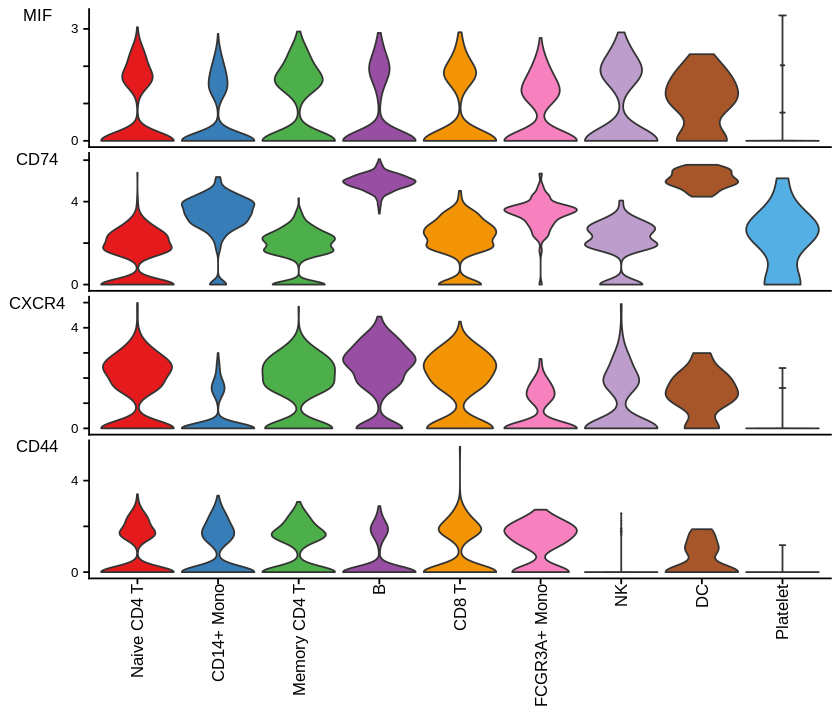

In [97]:
options(repr.plot.width = 7, repr.plot.height = 6)
plotGeneExpression(cellchat, signaling = "MIF", enriched.only = TRUE, type = "violin")



---

# Systems analysis of cell-cell communication network

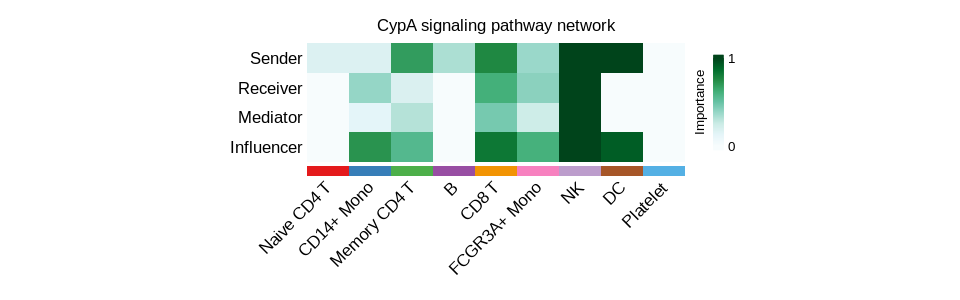

In [100]:
options(repr.plot.width = 8, repr.plot.height = 2.5)
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")
netAnalysis_signalingRole_network(cellchat, signaling = pathways.show, width = 8, height = 2.5, font.size = 10)

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways



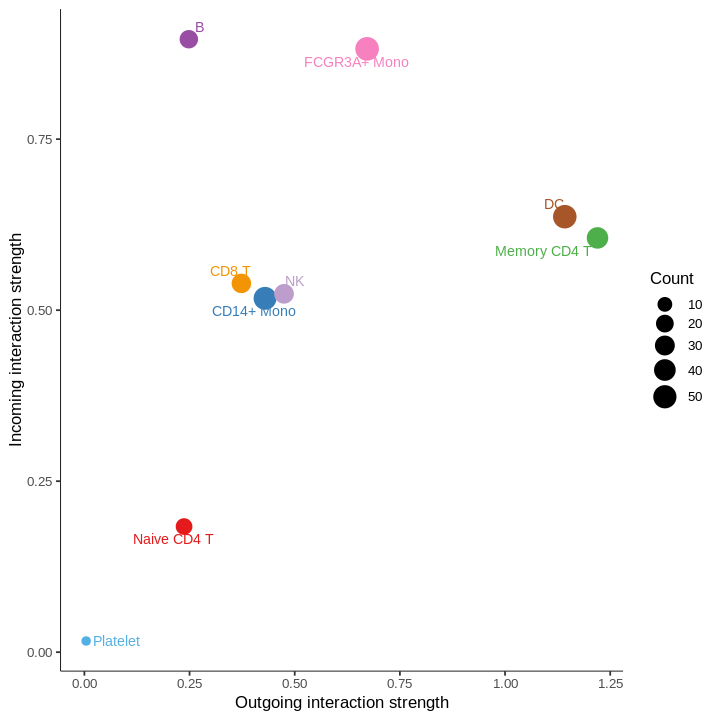

In [101]:
options(repr.plot.width = 6, repr.plot.height = 6)
netAnalysis_signalingRole_scatter(cellchat)

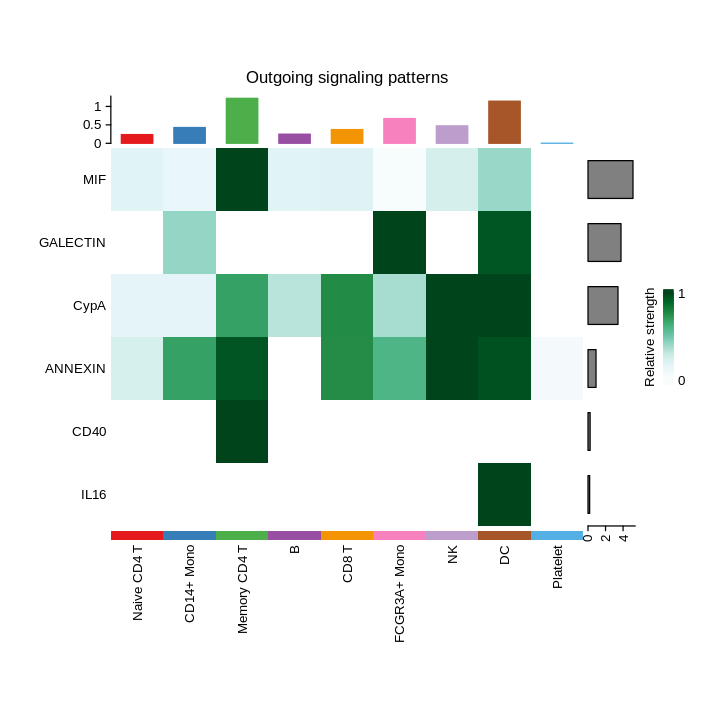

In [109]:
options(repr.plot.width = 6, repr.plot.height = 6)
netAnalysis_signalingRole_heatmap(cellchat, pattern = "outgoing")

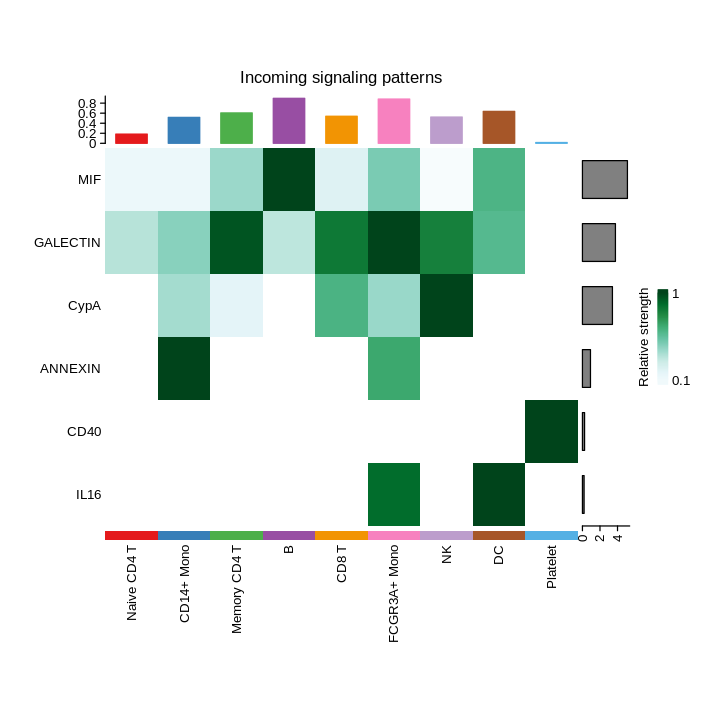

In [107]:
netAnalysis_signalingRole_heatmap(cellchat, pattern = "incoming")

In [112]:
install.packages("NMF")
install.packages("ggalluvial")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘lazyeval’




In [113]:
library(NMF)
library(ggalluvial)

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 2/2

  To enable shared memory capabilities, try: install.extras('
NMF
')


Attaching package: ‘NMF’


The following objects are masked from ‘package:igraph’:

    algorithm, compare




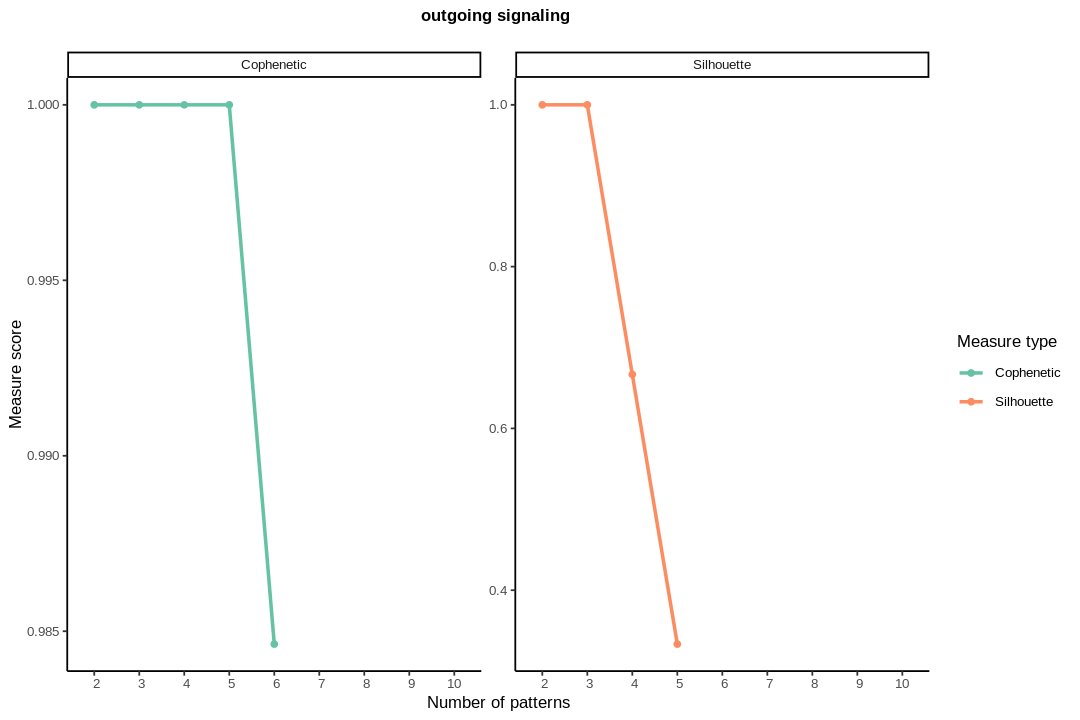

In [115]:
options(repr.plot.width = 9, repr.plot.height = 6)
selectK(cellchat, pattern = "outgoing")

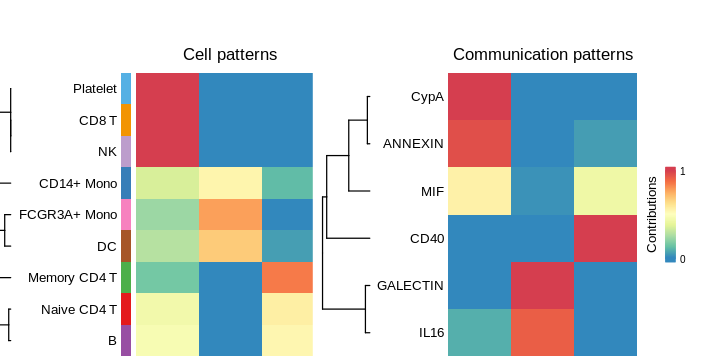

In [117]:
nPatterns = 3
options(repr.plot.width = 6, repr.plot.height = 3)
cellchat <- identifyCommunicationPatterns(cellchat, pattern = "outgoing", k = nPatterns)

Please make sure you have load `library(ggalluvial)` when running this function



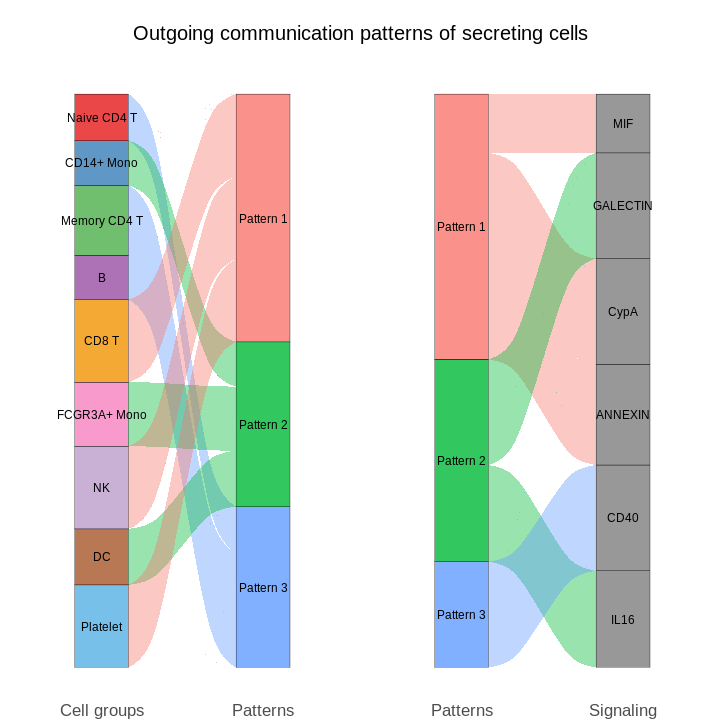

In [118]:
options(repr.plot.width = 6, repr.plot.height = 6)
netAnalysis_river(cellchat, pattern = "outgoing")

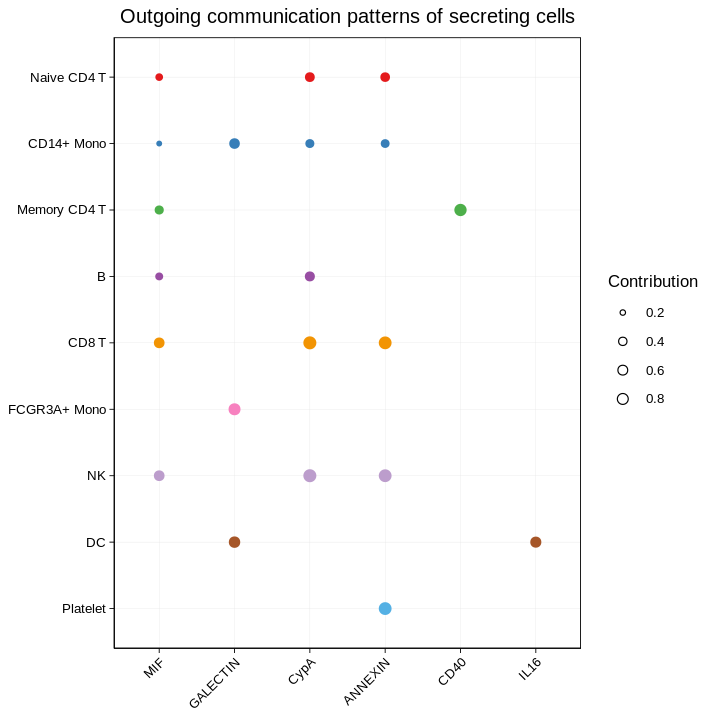

In [119]:
netAnalysis_dot(cellchat, pattern = "outgoing")

In [121]:
options(repr.plot.width = 6, repr.plot.height = 3)
selectK(cellchat, pattern = "incoming")

Timing stopped at: 11.34 0.674 12



In [124]:
system("pip install umap-learn", intern = T)

[1] "Requirement already satisfied: umap-learn in /usr/local/lib/python3.10/dist-packages (0.5.6)"                                                  
 [2] "Requirement already satisfied: numpy>=1.17 in /usr/local/lib/python3.10/dist-packages (from umap-learn) (1.26.4)"                              
 [3] "Requirement already satisfied: scipy>=1.3.1 in /usr/local/lib/python3.10/dist-packages (from umap-learn) (1.13.1)"                             
 [4] "Requirement already satisfied: scikit-learn>=0.22 in /usr/local/lib/python3.10/dist-packages (from umap-learn) (1.3.2)"                        
 [5] "Requirement already satisfied: numba>=0.51.2 in /usr/local/lib/python3.10/dist-packages (from umap-learn) (0.60.0)"                            
 [6] "Requirement already satisfied: pynndescent>=0.5 in /usr/local/lib/python3.10/dist-packages (from umap-learn) (0.5.13)"                         
 [7] "Requirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (from umap-learn) (4.66.4)"                                     
 [8] "Requirement already satisfied: llvmlite<0.44,>=0.43.0dev0 in /usr/local/lib/python3.10/dist-packages (from numba>=0.51.2->umap-learn) (0.43.0)"
 [9] "Requirement already satisfied: joblib>=0.11 in /usr/local/lib/python3.10/dist-packages (from pynndescent>=0.5->umap-learn) (1.4.2)"            
[10] "Requirement already satisfied: threadpoolctl>=2.0.0 in /usr/local/lib/python3.10/dist-packages (from scikit-learn>=0.22->umap-learn) (3.5.0)"

In [128]:
install.packages("future")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘globals’, ‘listenv’, ‘parallelly’




Manifold learning of the signaling networks for a single dataset 
Classification learning of the signaling networks for a single dataset 


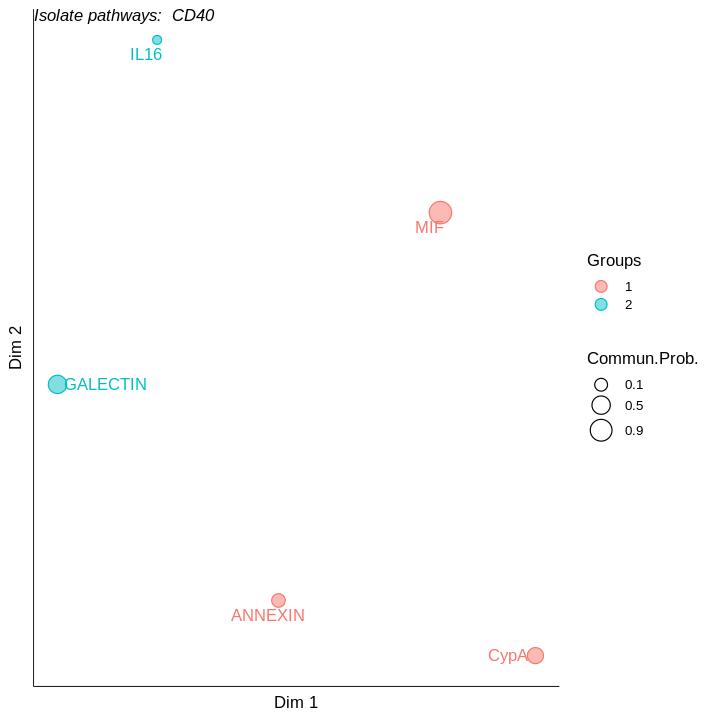

In [131]:
cellchat <- computeNetSimilarity(cellchat, type = "functional")
cellchat <- netEmbedding(cellchat, type = "functional")
#> Manifold learning of the signaling networks for a single dataset
cellchat <- netClustering(cellchat, type = "functional")
#> Classification learning of the signaling networks for a single dataset
# Visualization in 2D-space
options(repr.plot.width = 6, repr.plot.height = 6)
netVisual_embedding(cellchat, type = "functional", label.size = 3.5)

Manifold learning of the signaling networks for a single dataset 
Classification learning of the signaling networks for a single dataset 


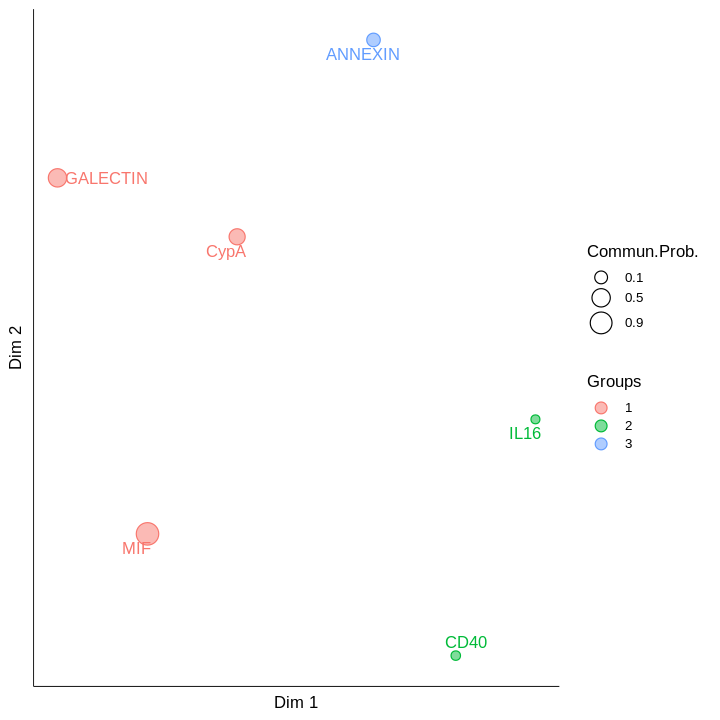

In [132]:
cellchat <- computeNetSimilarity(cellchat, type = "structural")
cellchat <- netEmbedding(cellchat, type = "structural")
#> Manifold learning of the signaling networks for a single dataset
cellchat <- netClustering(cellchat, type = "structural")
#> Classification learning of the signaling networks for a single dataset
# Visualization in 2D-space
netVisual_embedding(cellchat, type = "structural", label.size = 3.5)

In [134]:
install.packages("bsicons")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [135]:
runCellChatApp(cellchat)

Loading required package: shiny


Listening on http://127.0.0.1:3844

